In [4]:
import pandas as pd

# File path pointing to Desktop
file_path = 'Desktop/retail_store_inventory.csv'

# Load the data
df = pd.read_csv(file_path)

# Preview
print("✅ Data loaded successfully! Here's a preview:")
display(df.head())
print("\nColumns:", df.columns.tolist())
print("\nShape:", df.shape)


✅ Data loaded successfully! Here's a preview:


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer



Columns: ['Date', 'Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing', 'Seasonality']

Shape: (73100, 15)


In [5]:
# Check for missing values in each column
print("✅ Checking for missing values...")
print(df.isnull().sum())


✅ Checking for missing values...
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [6]:
# Check data types and non-null counts
print("✅ Basic info about dataset:")
df.info()


✅ Basic info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), 

In [7]:
df.describe()


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [8]:
df.groupby('Product ID')['Units Sold'].sum().sort_values(ascending=False).head()


Product ID
P0016    508472
P0020    507708
P0014    507622
P0015    507283
P0005    503648
Name: Units Sold, dtype: int64

In [9]:
df['Revenue'] = df['Units Sold'] * df['Price']
df.groupby('Product ID')['Revenue'].sum().sort_values(ascending=False).head()


Product ID
P0020    28306192.40
P0011    28155025.56
P0016    28153328.38
P0014    28110375.77
P0005    27916663.02
Name: Revenue, dtype: float64

Matplotlib is building the font cache; this may take a moment.


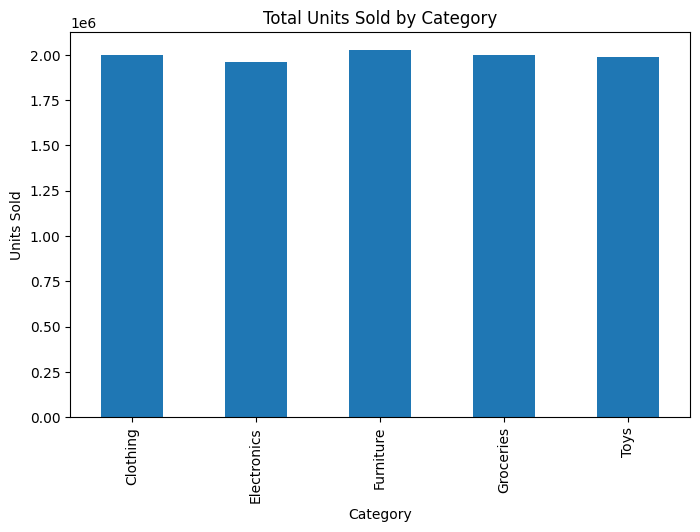

In [10]:
import matplotlib.pyplot as plt

df.groupby('Category')['Units Sold'].sum().plot(kind='bar', figsize=(8,5), title='Total Units Sold by Category')
plt.ylabel('Units Sold')
plt.show()


In [11]:
# Units sold by region
df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)


Region
East     2511265
South    2507799
North    2484966
West     2471552
Name: Units Sold, dtype: int64

In [12]:
# Revenue by seasonality
df.groupby('Seasonality')['Revenue'].sum().sort_values(ascending=False)



Seasonality
Winter    1.382696e+08
Autumn    1.380592e+08
Spring    1.371123e+08
Summer    1.367878e+08
Name: Revenue, dtype: float64

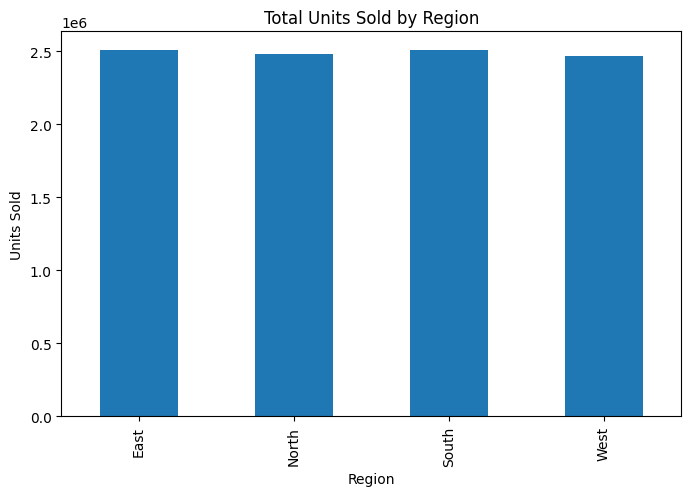

In [13]:
df.groupby('Region')['Units Sold'].sum().plot(kind='bar', title='Total Units Sold by Region', figsize=(8,5))
plt.ylabel('Units Sold')
plt.show()


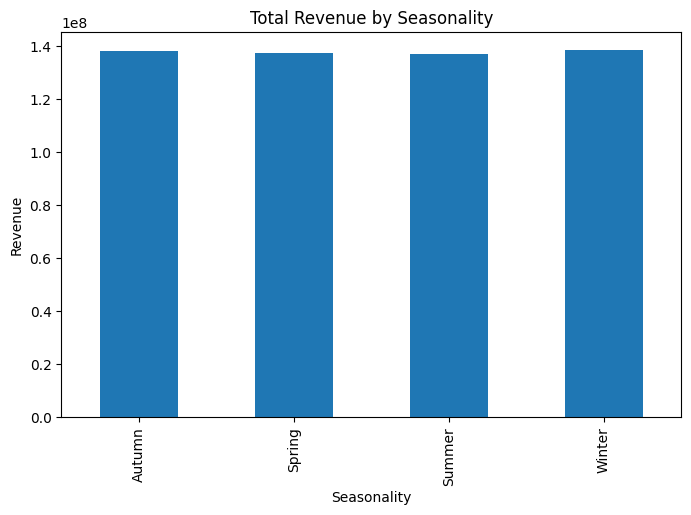

In [14]:
df.groupby('Seasonality')['Revenue'].sum().plot(kind='bar', title='Total Revenue by Seasonality', figsize=(8,5))
plt.ylabel('Revenue')
plt.show()


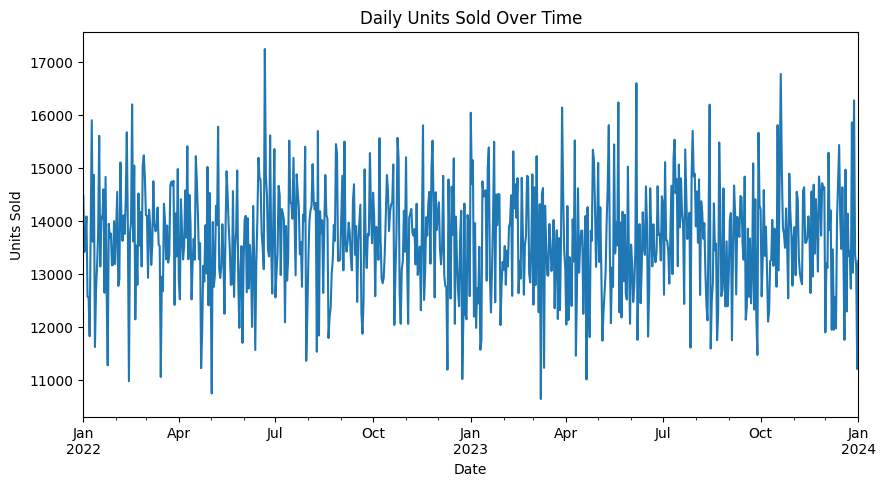

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.groupby('Date')['Units Sold'].sum().plot(figsize=(10,5), title='Daily Units Sold Over Time')
plt.ylabel('Units Sold')
plt.show()


In [16]:
# Units sold by Region
df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)

# Revenue by Seasonality
df.groupby('Seasonality')['Revenue'].sum().sort_values(ascending=False)

# Revenue by Weather Condition
df.groupby('Weather Condition')['Revenue'].sum().sort_values(ascending=False)


Weather Condition
Sunny     1.390942e+08
Cloudy    1.384816e+08
Rainy     1.366738e+08
Snowy     1.359793e+08
Name: Revenue, dtype: float64

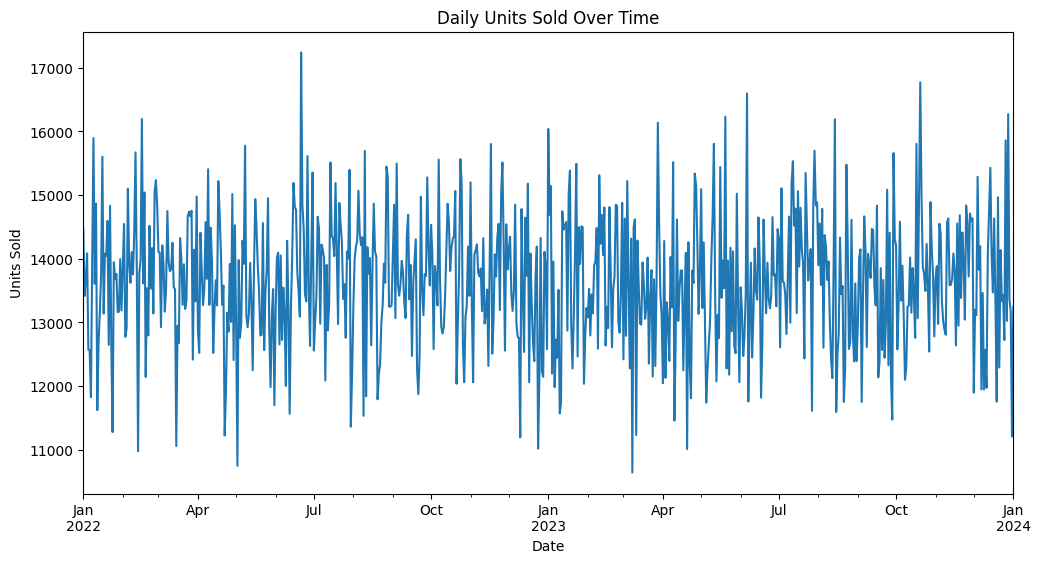

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.groupby('Date')['Units Sold'].sum().plot(figsize=(12,6), title='Daily Units Sold Over Time')
plt.ylabel('Units Sold')
plt.show()


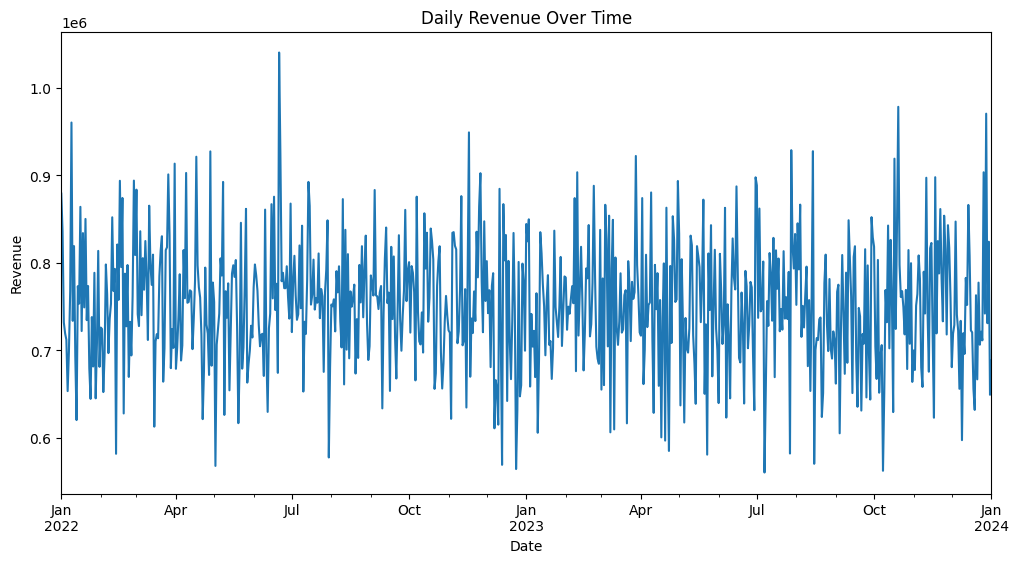

In [18]:
df.groupby('Date')['Revenue'].sum().plot(figsize=(12,6), title='Daily Revenue Over Time')
plt.ylabel('Revenue')
plt.show()


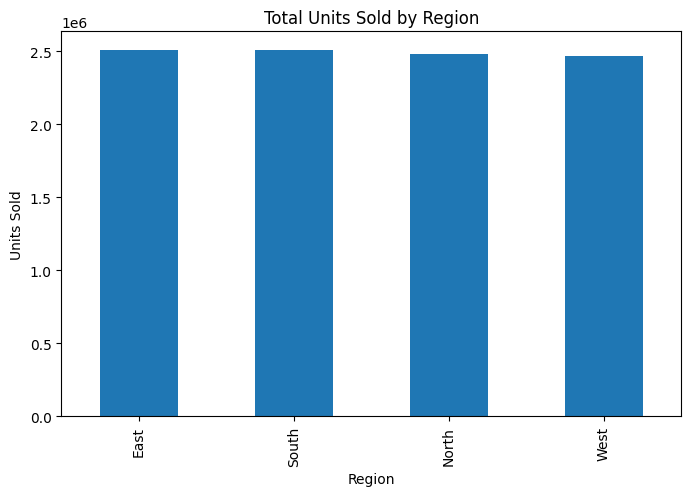

In [19]:
df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,5),
    title='Total Units Sold by Region'
)
plt.ylabel('Units Sold')
plt.show()


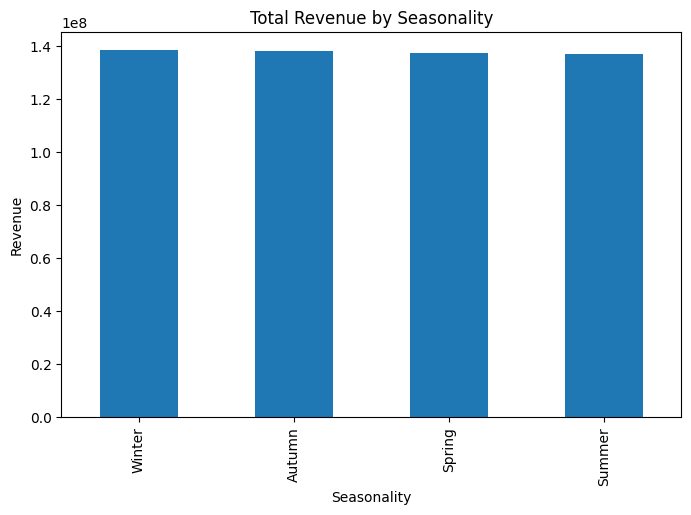

In [20]:
df.groupby('Seasonality')['Revenue'].sum().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,5),
    title='Total Revenue by Seasonality'
)
plt.ylabel('Revenue')
plt.show()


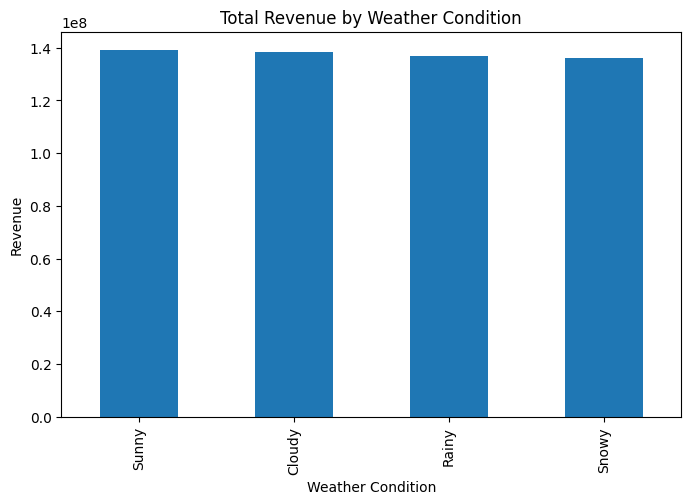

In [21]:
df.groupby('Weather Condition')['Revenue'].sum().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,5),
    title='Total Revenue by Weather Condition'
)
plt.ylabel('Revenue')
plt.show()


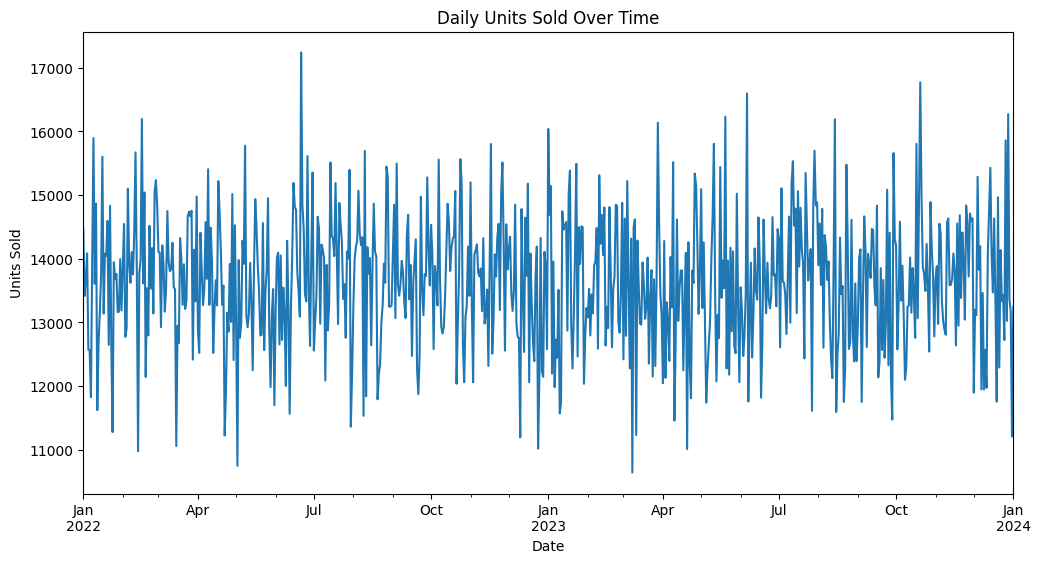

In [22]:
df.groupby('Date')['Units Sold'].sum().plot(
    figsize=(12,6),
    title='Daily Units Sold Over Time'
)
plt.ylabel('Units Sold')
plt.show()


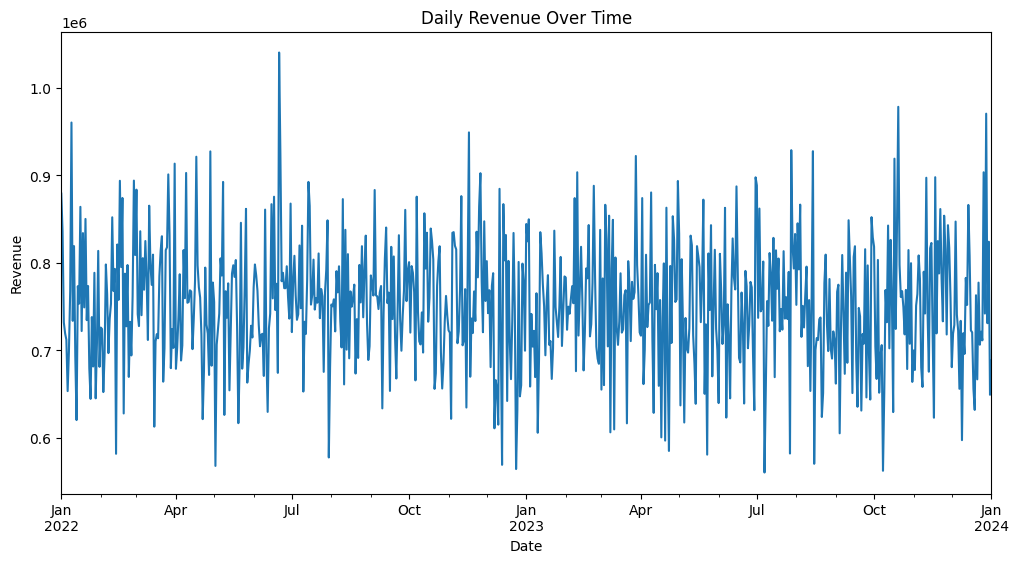

In [23]:
df.groupby('Date')['Revenue'].sum().plot(
    figsize=(12,6),
    title='Daily Revenue Over Time'
)
plt.ylabel('Revenue')
plt.show()


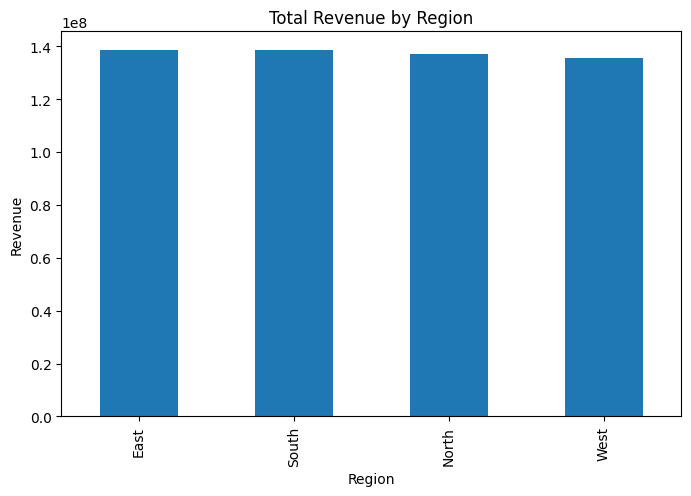

In [24]:
df.groupby('Region')['Revenue'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(8,5), title='Total Revenue by Region')
plt.ylabel('Revenue')
plt.show()


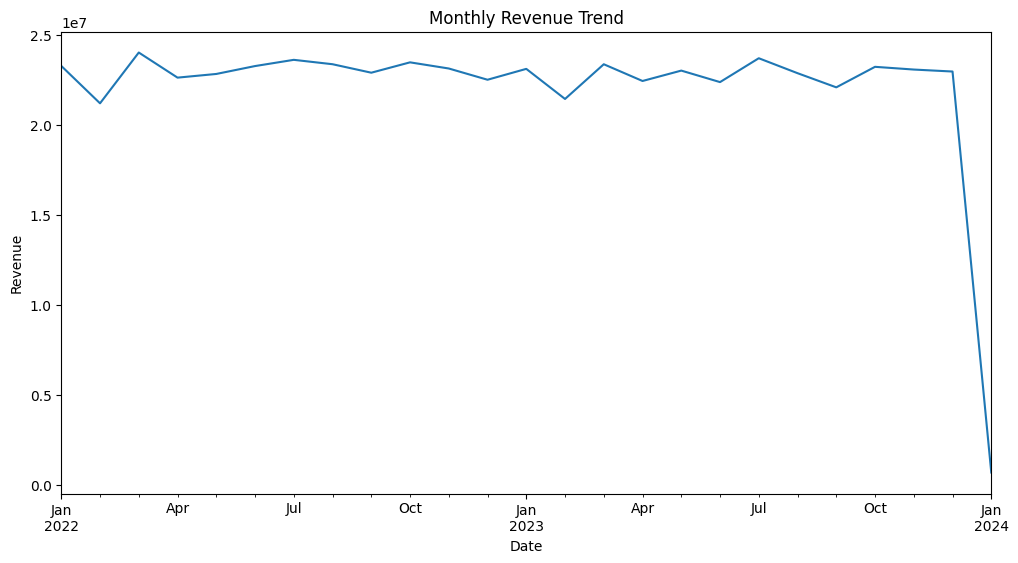

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum().plot(figsize=(12,6), title='Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.show()


# Supply Chain Analysis Report

This notebook explores retail store inventory and sales data (73,100 records)  
using Python for data cleaning, aggregation, and visualization.

## Key Analyses
- Total units sold by category
- Revenue trends over time
- Product-level sales and revenue

## Insights
- Top product by units sold: P0016  
- Revenue peaks during certain months, suggesting seasonality



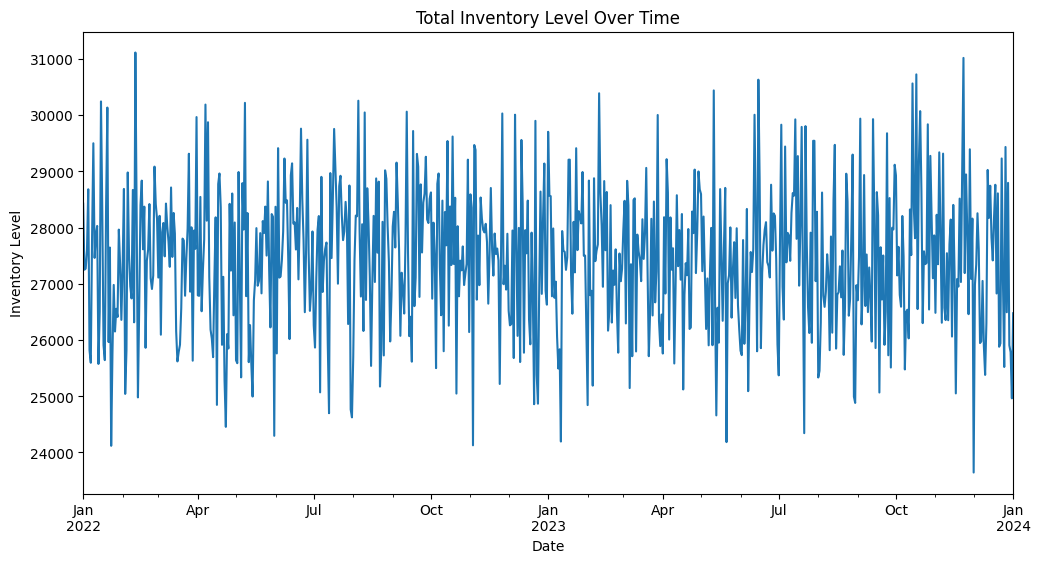

In [26]:
df.groupby('Date')['Inventory Level'].sum().plot(figsize=(12,6), title='Total Inventory Level Over Time')
plt.ylabel('Inventory Level')
plt.show()


In [27]:
import seaborn as sns
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
pivot = df.pivot_table(values='Revenue', index='Month', columns='Year', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Monthly Revenue Heatmap')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [28]:
!pip install seaborn


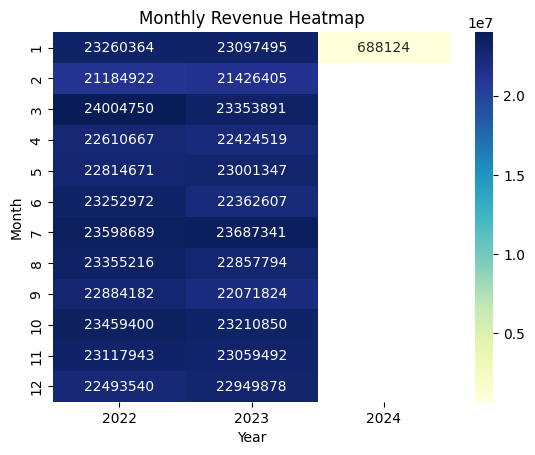

In [29]:
import seaborn as sns

df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

pivot = df.pivot_table(values='Revenue', index='Month', columns='Year', aggfunc='sum')

sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Monthly Revenue Heatmap')
plt.show()


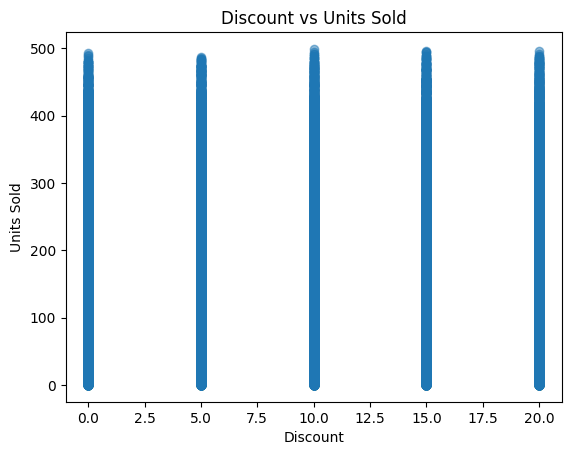

In [30]:
# Correlation between Discount and Units Sold
import matplotlib.pyplot as plt
plt.scatter(df['Discount'], df['Units Sold'], alpha=0.5)
plt.xlabel('Discount')
plt.ylabel('Units Sold')
plt.title('Discount vs Units Sold')
plt.show()
